In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df_baselines = pd.read_csv('../baslines.csv')[["embedder", "dataset", "metric_test"]]
df_distill = pd.read_csv('../model_95.csv')[["embedder", "dataset", "metric_test"]]
df_distill["embedder"] = "distill"

df_distill

,embedder,dataset,metric_test
0,distill,AMES,0.821482
1,distill,BBB_Martins,0.863680
2,distill,Bioavailability_Ma,0.667941
3,distill,CYP1A2_Veith,0.916484
4,distill,CYP2C19_Veith,0.872345
5,distill,CYP2C9_Substrate_CarbonMangels,0.639949
6,distill,CYP2C9_Veith,0.876092
7,distill,CYP2D6_Substrate_CarbonMangels,0.767750
8,distill,CYP2D6_Veith,0.847764
9,distill,CYP3A4_Substrate_CarbonMangels,0.590039


In [81]:
MODELS_TO_KEEP = [
    "ChemBertMLM-10M",
    "ChemBertMTR-77M",
    "ChemGPT-1.2B",
    "ContextPred",
    "GraphMVP",
    "GROVER",
    "GraphLog",
    "GraphCL",
    "InfoGraph",
    "FRAD_QM9",
    "MolR_gat",
    "ThreeDInfomax",
]

df_baselines = df_baselines[df_baselines.embedder.isin(MODELS_TO_KEEP)]

In [82]:
df_or = pd.concat([df_baselines, df_distill]).groupby(["dataset", "embedder"]).metric_test.mean().reset_index()
df = df_or.pivot_table(index="embedder", columns="dataset", values="metric_test")
df.dropna(axis=1, inplace=True)
# drop column and index names
df.index.name = None

df

dataset,AMES,BBB_Martins,Bioavailability_Ma,CYP1A2_Veith,CYP2C19_Veith,CYP2C9_Substrate_CarbonMangels,CYP2C9_Veith,CYP2D6_Substrate_CarbonMangels,CYP2D6_Veith,CYP3A4_Substrate_CarbonMangels,CYP3A4_Veith,Carcinogens_Lagunin,ClinTox,DILI,HIA_Hou,Pgp_Broccatelli,Skin__Reaction,Tox21,hERG
ChemBertMLM-10M,0.786462,0.864915,0.612734,0.881544,0.830398,0.605532,0.824516,0.719256,0.800575,0.618745,0.830000,0.763273,0.618380,0.776119,0.830197,0.842590,0.622962,0.716370,0.732599
ChemBertMTR-77M,0.825193,0.890093,0.617631,0.907571,0.873122,0.581394,0.854803,0.706433,0.844157,0.618875,0.871974,0.797583,0.707317,0.824737,0.894110,0.891828,0.616723,0.755508,0.798463
ChemGPT-1.2B,0.769141,0.858849,0.610631,0.885828,0.830834,0.606775,0.832009,0.698013,0.797897,0.600754,0.839076,0.755130,0.690442,0.817829,0.883207,0.880411,0.665293,0.710595,0.770182
ContextPred,0.752760,0.806021,0.618476,0.852774,0.765720,0.575958,0.790585,0.694077,0.761052,0.588034,0.773305,0.696287,0.595125,0.823465,0.773019,0.818825,0.519493,0.676041,0.716045
FRAD_QM9,0.803100,0.870043,0.570826,0.898090,0.835412,0.600428,0.840007,0.697988,0.803130,0.591039,0.841557,0.712673,0.616767,0.795279,0.892013,0.870397,0.547743,0.733089,0.780368
GROVER,0.804318,0.841819,0.626739,0.856602,0.833980,0.589144,0.816791,0.751231,0.813748,0.579892,0.807084,0.784601,0.573103,0.816960,0.859216,0.817049,0.536178,0.705832,0.712610
GraphCL,0.819956,0.837992,0.632152,0.881145,0.851317,0.565491,0.827024,0.740165,0.825080,0.566379,0.833751,0.812693,0.611270,0.805605,0.838618,0.839201,0.524635,0.707099,0.716661
GraphLog,0.828881,0.836659,0.629561,0.880507,0.845236,0.619347,0.839953,0.768875,0.814221,0.578943,0.839138,0.848549,0.683271,0.802514,0.830531,0.847201,0.510729,0.732584,0.739062
GraphMVP,0.821513,0.843816,0.634869,0.878253,0.854505,0.597832,0.841797,0.731677,0.823108,0.589968,0.831727,0.754091,0.614096,0.856904,0.873807,0.862658,0.530639,0.722344,0.728492
InfoGraph,0.789250,0.782269,0.610043,0.858040,0.813720,0.579586,0.806084,0.639540,0.802170,0.522432,0.804520,0.780477,0.574353,0.803559,0.790886,0.817029,0.562860,0.687380,0.707534


In [83]:
df.mean(axis=1).sort_values(ascending=False)

distill            0.797133
ThreeDInfomax      0.785213
ChemBertMTR-77M    0.783027
MolR_gat           0.780205
ChemGPT-1.2B       0.763310
GraphLog           0.761882
GraphMVP           0.757479
FRAD_QM9           0.752629
ChemBertMLM-10M    0.751430
GraphCL            0.749275
GROVER             0.743521
InfoGraph          0.722723
ContextPred        0.715635
dtype: float64

In [84]:
DATASET_NEW_NAME = {
    "hERG": "hERG",
    "hERG_Karim": "hERG (k)",
    "AMES": "AMES",
    "DILI": "DILI",
    "Carcinogens_Lagunin": "Carcinogens",
    "Skin__Reaction": "Skin R",
    "Tox21": "Tox21",
    "ClinTox": "ClinTox",
    "LD50_Zhu": "LD50",
    "PAMPA_NCATS": "PAMPA",
    "HIA_Hou": "HIA",
    "Pgp_Broccatelli": "Pgp",
    "Bioavailability_Ma": "Bioavailability",
    "Caco2_Wang": "Caco2",
    "Lipophilicity_AstraZeneca": "Lipophilicity",
    "Solubility_AqSolDB": "Solubility",
    "HydrationFreeEnergy_FreeSolv": "FreeSolv",
    "BBB_Martins": "BBB",
    "PPBR_AZ": "PPBR",
    "VDss_Lombardo": "VDss",
    "CYP2C19_Veith": "CYP2C19",
    "CYP2D6_Veith": "CYP2D6",
    "CYP3A4_Veith": "CYP3A4",
    "CYP1A2_Veith": "CYP1A2",
    "CYP2C9_Veith": "CYP2C9",
    "CYP2C9_Substrate_CarbonMangels" : "CYP2C9 (s)",
    "CYP2D6_Substrate_CarbonMangels" : "CYP2D6 (s)",
    "CYP3A4_Substrate_CarbonMangels" : "CYP3A4 (s)",
    "Half_Life_Obach" : "Half Life",
    "Clearance_Hepatocyte_AZ" : "Clearance (H)",
    "Clearance_Microsome_AZ" : "Clearance (M)",
}

DATASET_NEW_NAME = {d: DATASET_NEW_NAME[d] for d in DATASET_NEW_NAME if d in df.columns}
df = df.rename(columns=DATASET_NEW_NAME)
df = df[DATASET_NEW_NAME.values()]
df

dataset,hERG,AMES,DILI,Carcinogens,Skin R,Tox21,ClinTox,HIA,Pgp,Bioavailability,BBB,CYP2C19,CYP2D6,CYP3A4,CYP1A2,CYP2C9,CYP2C9 (s),CYP2D6 (s),CYP3A4 (s)
ChemBertMLM-10M,0.732599,0.786462,0.776119,0.763273,0.622962,0.716370,0.618380,0.830197,0.842590,0.612734,0.864915,0.830398,0.800575,0.830000,0.881544,0.824516,0.605532,0.719256,0.618745
ChemBertMTR-77M,0.798463,0.825193,0.824737,0.797583,0.616723,0.755508,0.707317,0.894110,0.891828,0.617631,0.890093,0.873122,0.844157,0.871974,0.907571,0.854803,0.581394,0.706433,0.618875
ChemGPT-1.2B,0.770182,0.769141,0.817829,0.755130,0.665293,0.710595,0.690442,0.883207,0.880411,0.610631,0.858849,0.830834,0.797897,0.839076,0.885828,0.832009,0.606775,0.698013,0.600754
ContextPred,0.716045,0.752760,0.823465,0.696287,0.519493,0.676041,0.595125,0.773019,0.818825,0.618476,0.806021,0.765720,0.761052,0.773305,0.852774,0.790585,0.575958,0.694077,0.588034
FRAD_QM9,0.780368,0.803100,0.795279,0.712673,0.547743,0.733089,0.616767,0.892013,0.870397,0.570826,0.870043,0.835412,0.803130,0.841557,0.898090,0.840007,0.600428,0.697988,0.591039
GROVER,0.712610,0.804318,0.816960,0.784601,0.536178,0.705832,0.573103,0.859216,0.817049,0.626739,0.841819,0.833980,0.813748,0.807084,0.856602,0.816791,0.589144,0.751231,0.579892
GraphCL,0.716661,0.819956,0.805605,0.812693,0.524635,0.707099,0.611270,0.838618,0.839201,0.632152,0.837992,0.851317,0.825080,0.833751,0.881145,0.827024,0.565491,0.740165,0.566379
GraphLog,0.739062,0.828881,0.802514,0.848549,0.510729,0.732584,0.683271,0.830531,0.847201,0.629561,0.836659,0.845236,0.814221,0.839138,0.880507,0.839953,0.619347,0.768875,0.578943
GraphMVP,0.728492,0.821513,0.856904,0.754091,0.530639,0.722344,0.614096,0.873807,0.862658,0.634869,0.843816,0.854505,0.823108,0.831727,0.878253,0.841797,0.597832,0.731677,0.589968
InfoGraph,0.707534,0.789250,0.803559,0.780477,0.562860,0.687380,0.574353,0.790886,0.817029,0.610043,0.782269,0.813720,0.802170,0.804520,0.858040,0.806084,0.579586,0.639540,0.522432


In [72]:
DATASET_NEW_NAME.values()

dict_values(['hERG', 'AMES', 'DILI', 'Carcinogens', 'Skin R', 'Tox21', 'ClinTox', 'HIA', 'Pgp', 'Bioavailability', 'BBB', 'CYP2C19', 'CYP2D6', 'CYP3A4', 'CYP1A2', 'CYP2C9', 'CYP2C9 (s)', 'CYP2D6 (s)', 'CYP3A4 (s)'])

In [76]:
df

dataset,hERG,AMES,DILI,Carcinogens,Skin R,Tox21,ClinTox,HIA,Pgp,Bioavailability,BBB,CYP2C19,CYP2D6,CYP3A4,CYP1A2,CYP2C9,CYP2C9 (s),CYP2D6 (s),CYP3A4 (s)
ChemBertMLM-10M,0.732599,0.786462,0.776119,0.763273,0.622962,0.716370,0.618380,0.830197,0.842590,0.612734,0.864915,0.830398,0.800575,0.830000,0.881544,0.824516,0.605532,0.719256,0.618745
ChemBertMTR-77M,0.798463,0.825193,0.824737,0.797583,0.616723,0.755508,0.707317,0.894110,0.891828,0.617631,0.890093,0.873122,0.844157,0.871974,0.907571,0.854803,0.581394,0.706433,0.618875
ChemGPT-1.2B,0.770182,0.769141,0.817829,0.755130,0.665293,0.710595,0.690442,0.883207,0.880411,0.610631,0.858849,0.830834,0.797897,0.839076,0.885828,0.832009,0.606775,0.698013,0.600754
ContextPred,0.716045,0.752760,0.823465,0.696287,0.519493,0.676041,0.595125,0.773019,0.818825,0.618476,0.806021,0.765720,0.761052,0.773305,0.852774,0.790585,0.575958,0.694077,0.588034
FRAD_QM9,0.780368,0.803100,0.795279,0.712673,0.547743,0.733089,0.616767,0.892013,0.870397,0.570826,0.870043,0.835412,0.803130,0.841557,0.898090,0.840007,0.600428,0.697988,0.591039
GROVER,0.712610,0.804318,0.816960,0.784601,0.536178,0.705832,0.573103,0.859216,0.817049,0.626739,0.841819,0.833980,0.813748,0.807084,0.856602,0.816791,0.589144,0.751231,0.579892
GraphCL,0.716661,0.819956,0.805605,0.812693,0.524635,0.707099,0.611270,0.838618,0.839201,0.632152,0.837992,0.851317,0.825080,0.833751,0.881145,0.827024,0.565491,0.740165,0.566379
GraphLog,0.739062,0.828881,0.802514,0.848549,0.510729,0.732584,0.683271,0.830531,0.847201,0.629561,0.836659,0.845236,0.814221,0.839138,0.880507,0.839953,0.619347,0.768875,0.578943
GraphMVP,0.728492,0.821513,0.856904,0.754091,0.530639,0.722344,0.614096,0.873807,0.862658,0.634869,0.843816,0.854505,0.823108,0.831727,0.878253,0.841797,0.597832,0.731677,0.589968
InfoGraph,0.707534,0.789250,0.803559,0.780477,0.562860,0.687380,0.574353,0.790886,0.817029,0.610043,0.782269,0.813720,0.802170,0.804520,0.858040,0.806084,0.579586,0.639540,0.522432


In [75]:
# Bold the best value for each dataset
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]



df.style.apply(highlight_max, axis=0)



dataset,hERG,AMES,DILI,Carcinogens,Skin R,Tox21,ClinTox,HIA,Pgp,Bioavailability,BBB,CYP2C19,CYP2D6,CYP3A4,CYP1A2,CYP2C9,CYP2C9 (s),CYP2D6 (s),CYP3A4 (s)
ChemBertMLM-10M,0.732599,0.786462,0.776119,0.763273,0.622962,0.716370,0.618380,0.830197,0.842590,0.612734,0.864915,0.830398,0.800575,0.830000,0.881544,0.824516,0.605532,0.719256,0.618745
ChemBertMTR-77M,0.798463,0.825193,0.824737,0.797583,0.616723,0.755508,0.707317,0.894110,0.891828,0.617631,0.890093,0.873122,0.844157,0.871974,0.907571,0.854803,0.581394,0.706433,0.618875
ChemGPT-1.2B,0.770182,0.769141,0.817829,0.755130,0.665293,0.710595,0.690442,0.883207,0.880411,0.610631,0.858849,0.830834,0.797897,0.839076,0.885828,0.832009,0.606775,0.698013,0.600754
ContextPred,0.716045,0.752760,0.823465,0.696287,0.519493,0.676041,0.595125,0.773019,0.818825,0.618476,0.806021,0.765720,0.761052,0.773305,0.852774,0.790585,0.575958,0.694077,0.588034
FRAD_QM9,0.780368,0.803100,0.795279,0.712673,0.547743,0.733089,0.616767,0.892013,0.870397,0.570826,0.870043,0.835412,0.803130,0.841557,0.898090,0.840007,0.600428,0.697988,0.591039
GROVER,0.712610,0.804318,0.816960,0.784601,0.536178,0.705832,0.573103,0.859216,0.817049,0.626739,0.841819,0.833980,0.813748,0.807084,0.856602,0.816791,0.589144,0.751231,0.579892
GraphCL,0.716661,0.819956,0.805605,0.812693,0.524635,0.707099,0.611270,0.838618,0.839201,0.632152,0.837992,0.851317,0.825080,0.833751,0.881145,0.827024,0.565491,0.740165,0.566379
GraphLog,0.739062,0.828881,0.802514,0.848549,0.510729,0.732584,0.683271,0.830531,0.847201,0.629561,0.836659,0.845236,0.814221,0.839138,0.880507,0.839953,0.619347,0.768875,0.578943
GraphMVP,0.728492,0.821513,0.856904,0.754091,0.530639,0.722344,0.614096,0.873807,0.862658,0.634869,0.843816,0.854505,0.823108,0.831727,0.878253,0.841797,0.597832,0.731677,0.589968
InfoGraph,0.707534,0.789250,0.803559,0.780477,0.562860,0.687380,0.574353,0.790886,0.817029,0.610043,0.782269,0.813720,0.802170,0.804520,0.858040,0.806084,0.579586,0.639540,0.522432


In [40]:
df_or
# Remove all dataset with missing values
df_or = df_or[df_or.dataset.isin(df.columns)]

/tmp/ipykernel_32042/1047980773.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.metric_test = df_tmp.metric_test - df_or.groupby("dataset").metric_test.transform("min")


<AxesSubplot: xlabel='metric_test', ylabel='dataset'>

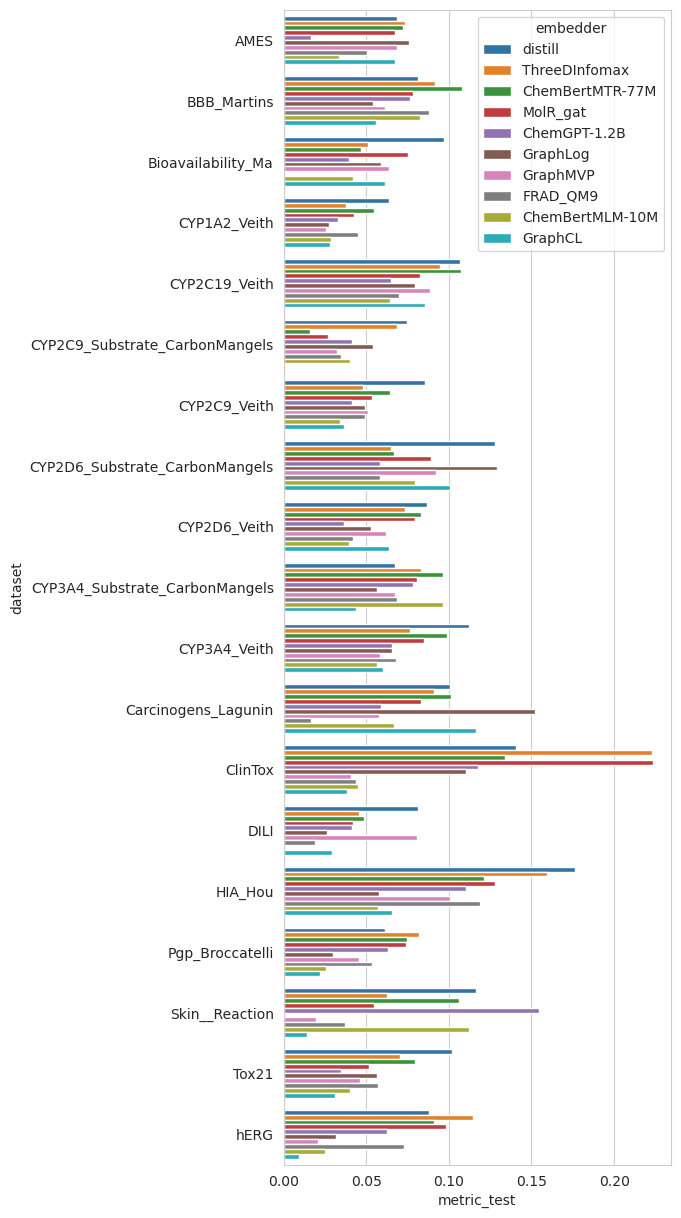

In [41]:
fig = plt.figure(figsize=(5, 15))
N_MODELS = 10
df_tmp = df_or[
    df_or.embedder.isin(models[:N_MODELS])
]
df_tmp.metric_test = df_tmp.metric_test - df_or.groupby("dataset").metric_test.transform("min")

sns.barplot(data=df_tmp, y="dataset", x="metric_test", hue="embedder", hue_order=models[:N_MODELS])